In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


# Load The Data

## Import libraries

In [2]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os

##  Load RAW Dataset

In [4]:
# Load dataset   
file = os.path.join('Resources','Crimes_2001_to_present.csv')
names = ['Date', 'Primary Type', 'Latitude', 'Longitude']
dataset = pd.read_csv(file)    
dataset = dataset.loc[:, names]
dataset = dataset[dataset['Primary Type'] != 'NON - CRIMINAL' ]
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL' ] 
dataset = dataset[dataset['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]
dataset = dataset.dropna(axis=0, how='any')
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')

In [6]:
dataset = dataset.dropna(how='any')
print(dataset.shape)
dataset.head()

(6811610, 4)


,Date,Primary Type,Latitude,Longitude
71,2019-06-19,HOMICIDE,41.763714,-87.691782
349,2019-06-19,HOMICIDE,41.711437,-87.639309
1348,2019-06-18,HOMICIDE,41.776019,-87.615520
2064,2019-06-17,HOMICIDE,41.935855,-87.644258
2138,2019-06-16,HOMICIDE,41.752480,-87.569903


## Save dataframe to file

In [7]:
file = os.path.join('Resources', 'Crimes_2001_2019.csv')
dataset.to_csv(file, encoding='utf-8', index=False)

 # Load Down Sized Dataset

In [8]:
file = os.path.join('Resources','Crimes_2001_2019.csv')
dataset = pd.read_csv(file)

## Peek at the Data

In [9]:
# head
dataset.head(5)

,Date,Primary Type,Latitude,Longitude
0,2019-06-19,HOMICIDE,41.763714,-87.691782
1,2019-06-19,HOMICIDE,41.711437,-87.639309
2,2019-06-18,HOMICIDE,41.776019,-87.615520
3,2019-06-17,HOMICIDE,41.935855,-87.644258
4,2019-06-16,HOMICIDE,41.752480,-87.569903


In [10]:
# shape and describe
print(dataset.shape)

(6811610, 4)


## Statistical Summary

In [11]:
# descriptions
print(dataset.describe())

           Latitude     Longitude
count  6.811610e+06  6.811610e+06
mean   4.184203e+01 -8.767178e+01
std    8.994493e-02  6.208642e-02
min    3.661945e+01 -9.168657e+01
25%    4.176891e+01 -8.771385e+01
50%    4.185551e+01 -8.766615e+01
75%    4.190682e+01 -8.762835e+01
max    4.202291e+01 -8.752453e+01


## Distribution

In [12]:
# distribution
print(dataset.groupby('Primary Type').size())

Primary Type
ARSON                                  11258
ASSAULT                               426624
BATTERY                              1250565
BURGLARY                              391369
CONCEALED CARRY LICENSE VIOLATION        372
CRIM SEXUAL ASSAULT                    26526
CRIMINAL DAMAGE                       780562
CRIMINAL TRESPASS                     195821
DECEPTIVE PRACTICE                    262080
DOMESTIC VIOLENCE                          1
GAMBLING                               14352
HOMICIDE                                9740
HUMAN TRAFFICKING                         52
INTERFERENCE WITH PUBLIC OFFICER       15745
INTIMIDATION                            3995
KIDNAPPING                              6706
LIQUOR LAW VIOLATION                   14013
MOTOR VEHICLE THEFT                   315862
NARCOTICS                             708649
OBSCENITY                                585
OFFENSE INVOLVING CHILDREN             44259
OTHER NARCOTIC VIOLATION                 1

# DATA EXTRACTION

In [13]:
options = ['BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'THEFT', 'OTHER OFFENSE']   
# selecting rows based on condition 
df = dataset[dataset['Primary Type'].isin(options)] 

for c in options:
    df.insert(2 + options.index(c), c, 0)
    
i = 0  
for c in df['Primary Type']:
    df.iat[i, df.columns.get_loc(c)] = 1
    i += 1

df.head()    

,Date,Primary Type,BATTERY,CRIMINAL DAMAGE,NARCOTICS,THEFT,OTHER OFFENSE,Latitude,Longitude
56,2019-05-21,OTHER OFFENSE,0,0,0,0,1,41.695110,-87.671597
58,2019-05-21,THEFT,0,0,0,1,0,41.889730,-87.734260
59,2019-05-21,NARCOTICS,0,0,1,0,0,41.750941,-87.625185
60,2019-05-21,BATTERY,1,0,0,0,0,41.668009,-87.625926
62,2019-05-21,CRIMINAL DAMAGE,0,1,0,0,0,41.750466,-87.622981


In [15]:
if 'Primary Type' in df:
    df.drop('Primary Type', axis=1, inplace=True)
df.columns = [ 'Date', 'battery', 'damage', 'narcotics', 'theft', 'other', 'Latitude', 'Longitude']
df.head() 

,Date,battery,damage,narcotics,theft,other,Latitude,Longitude
56,2019-05-21,0,0,0,0,1,41.695110,-87.671597
58,2019-05-21,0,0,0,1,0,41.889730,-87.734260
59,2019-05-21,0,0,1,0,0,41.750941,-87.625185
60,2019-05-21,1,0,0,0,0,41.668009,-87.625926
62,2019-05-21,0,1,0,0,0,41.750466,-87.622981


In [17]:
df.battery = df['battery'].astype(numpy.int64)
df.damage = df['damage'].astype(numpy.int64)
df.narcotics = df['narcotics'].astype(numpy.int64)
df.theft = df['theft'].astype(numpy.int64)
df.other = df['other'].astype(numpy.int64)
print(df.dtypes)

Date          object
battery        int64
damage         int64
narcotics      int64
theft          int64
other          int64
Latitude     float64
Longitude    float64
dtype: object


In [18]:
# DATE TIME STAMP FUNCTION
column_1 = pd.to_datetime(pd.Series(df.iloc[:,0]))
#print(type(column_1))
db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "dayofyear": column_1.dt.dayofyear,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "quarter": column_1.dt.quarter,
             })

In [19]:
if 'Date' in df:
    df.drop('Date', axis=1, inplace=True)
df=pd.concat([db,df],axis=1)
df = df.loc[:,~df.columns.duplicated()] 
df.head(10000)

,year,month,day,dayofyear,weekofyear,dayofweek,quarter,battery,damage,narcotics,theft,other,Latitude,Longitude
56,2019,5,21,141,21,1,2,0,0,0,0,1,41.695110,-87.671597
58,2019,5,21,141,21,1,2,0,0,0,1,0,41.889730,-87.734260
59,2019,5,21,141,21,1,2,0,0,1,0,0,41.750941,-87.625185
60,2019,5,21,141,21,1,2,1,0,0,0,0,41.668009,-87.625926
62,2019,5,21,141,21,1,2,0,1,0,0,0,41.750466,-87.622981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,2019,4,28,118,17,6,2,1,0,0,0,0,41.909978,-87.776463
15051,2019,4,28,118,17,6,2,0,1,0,0,0,41.932382,-87.735592
15052,2019,4,28,118,17,6,2,1,0,0,0,0,41.877565,-87.684791
15054,2019,4,28,118,17,6,2,0,1,0,0,0,41.691735,-87.686635


In [20]:
from random import sample
rindex =  numpy.array(sample(range(len(df)), 2500))
df = df.iloc[rindex, :]
df.head()

,year,month,day,dayofyear,weekofyear,dayofweek,quarter,battery,damage,narcotics,theft,other,Latitude,Longitude
824803,2016,4,1,92,13,4,2,0,0,0,1,0,41.963071,-87.655984
4809419,2005,4,6,96,14,2,2,0,0,1,0,0,41.849944,-87.705940
6637696,2001,5,17,137,20,3,2,0,0,0,0,1,41.785972,-87.592654
4204645,2006,8,3,215,31,3,3,1,0,0,0,0,41.917125,-87.729870
2702352,2010,3,24,83,12,2,1,0,0,0,0,1,41.801539,-87.616145


In [21]:
print(df.dtypes)
df.year = df['year'].astype(float)
df.month = df['month'].astype(float)
df.day = df['day'].astype(float)
df.dayofyear = df['dayofyear'].astype(float)
df.weekofyear = df['weekofyear'].astype(float)
df.dayofweek = df['dayofweek'].astype(float)
df.quarter = df['quarter'].astype(float)
print(df.dtypes)

year            int64
month           int64
day             int64
dayofyear       int64
weekofyear      int64
dayofweek       int64
quarter         int64
battery         int64
damage          int64
narcotics       int64
theft           int64
other           int64
Latitude      float64
Longitude     float64
dtype: object
year          float64
month         float64
day           float64
dayofyear     float64
weekofyear    float64
dayofweek     float64
quarter       float64
battery         int64
damage          int64
narcotics       int64
theft           int64
other           int64
Latitude      float64
Longitude     float64
dtype: object


## Save selected dataframe to file

In [22]:
file = os.path.join('Resources', 'Crimes_selected.csv')
df.to_csv(file, encoding='utf-8', index=False)

# Load selected data file ( Start from here to save time for running )

In [23]:
file = os.path.join('Resources','Crimes_selected.csv')
df = pd.read_csv(file)

# Data Visualization

## Univariate Plots

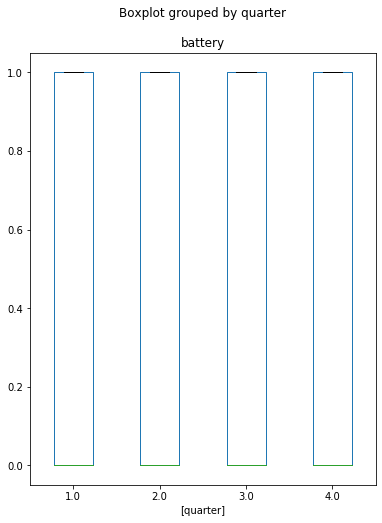

In [24]:
# box and whisker plots
for c in ['battery']:
    df.boxplot(by=['quarter'], column=[c], grid=False, figsize=(6,8))
    plt.show()

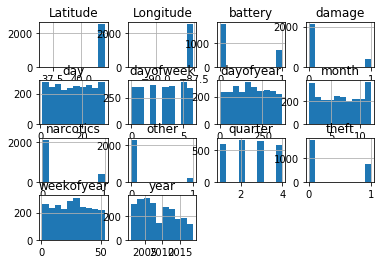

In [25]:
# histograms
df.hist()
plt.show()

## Multivariate Plots

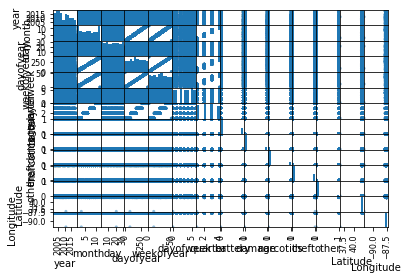

In [26]:
#scatter plot matrix
scatter_matrix(df)
plt.show()

# Data Visualization & Analysis

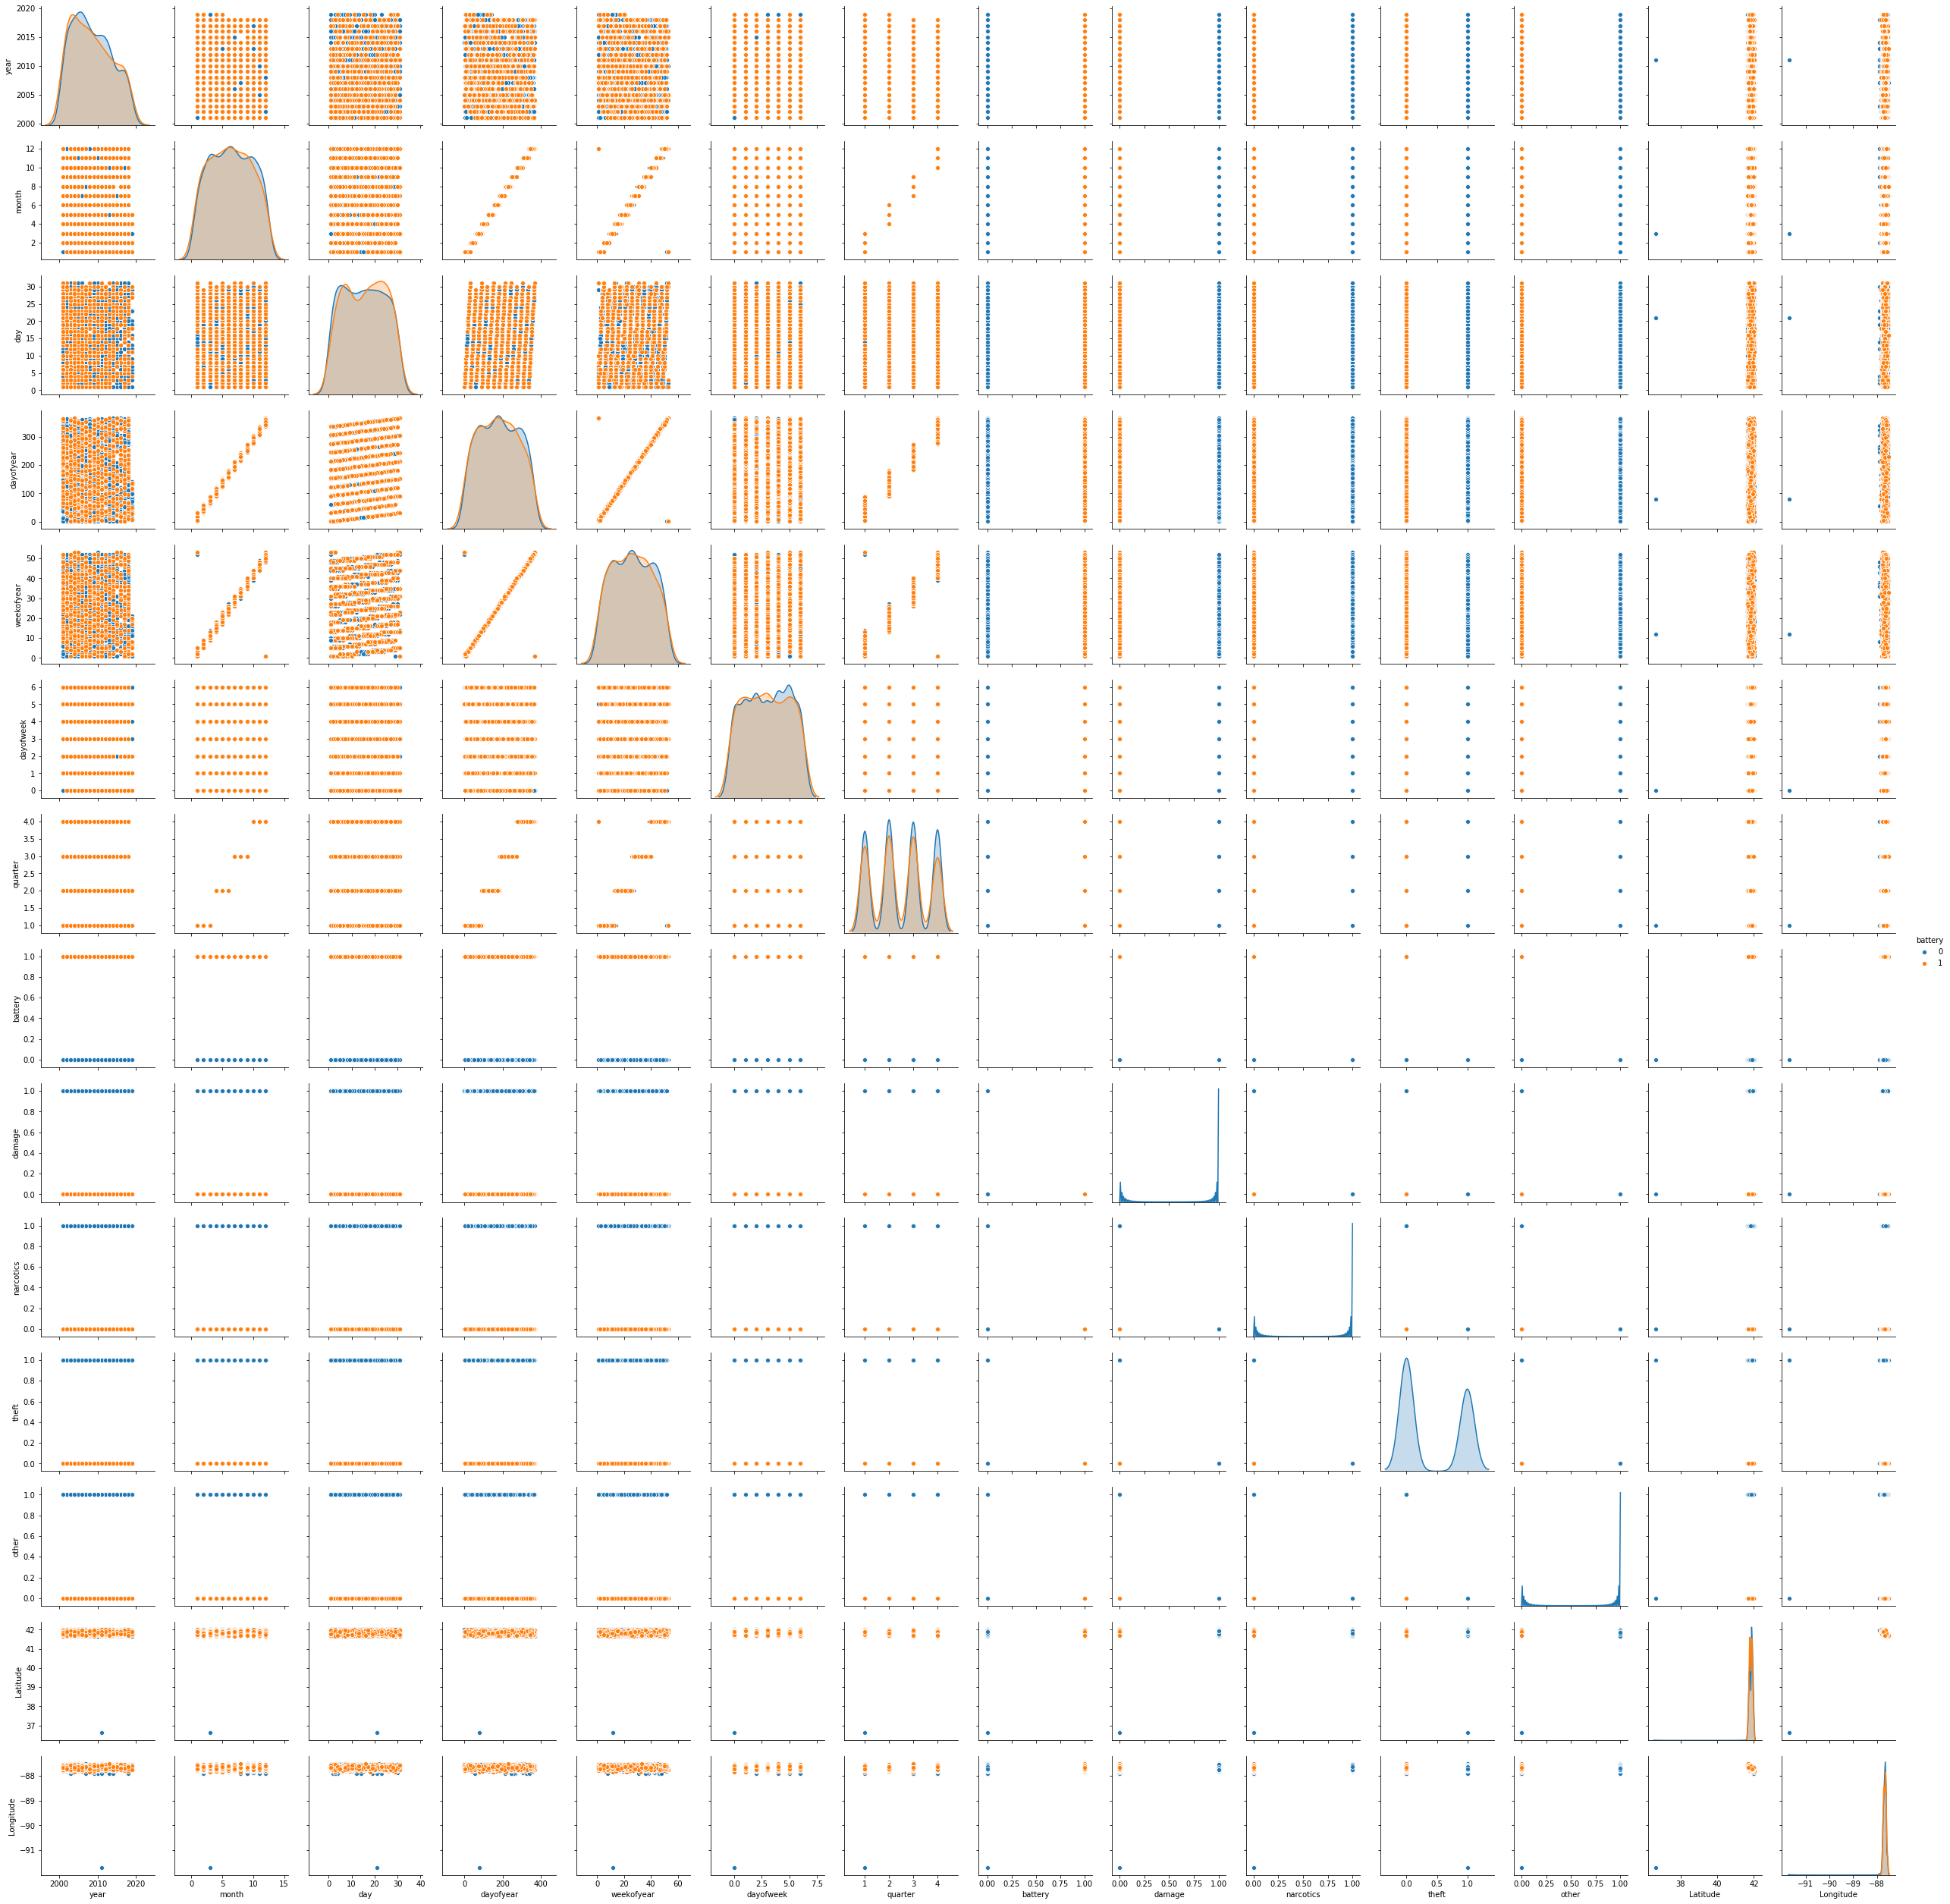

In [28]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df,hue='battery')